In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
sns.set()

In [2]:
#set working directory
os.chdir("C:/Users/Aurangzeb Alam/Desktop/Projects/5.Understanding Buying Behavior Using Hierarchical Clustering")

In [3]:
#Check the working Directory
os.getcwd()

'C:\\Users\\Aurangzeb Alam\\Desktop\\Projects\\5.Understanding Buying Behavior Using Hierarchical Clustering'

In [4]:
#Load the Data
Dataset = pd.read_csv("wholesale_customers.csv")

In [5]:
#Head of the data
Dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
#Drop irrelevant column
Dataset.drop(["Channel","Fresh"],axis=1, inplace=True)

In [7]:
#Statistical Description
Dataset.describe()

,Region,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.774272,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,2.000000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,3.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,3.000000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,3.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
#Missing value
missing_value = pd.DataFrame(Dataset.isnull().sum())
missing_value

,0
Region,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


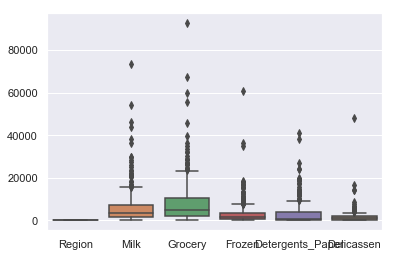

In [9]:
#Data Distribution
sns.boxplot(data=Dataset,orient="v")

In [10]:
#Numerical columns
numerical_columns = Dataset.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['Region', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [11]:
# Looping over all continuous variables to detect and remove Outliers
for i in numerical_columns:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(Dataset[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    print(minimum)
    maximum = q75 + (iqr*1.5)
    print(maximum)
    
    # Replacing all the outliers value to NA
    Dataset.loc[Dataset[i]< minimum,i] = np.nan
    Dataset.loc[Dataset[i]> maximum,i] = np.nan

0.5
4.5
-6952.875
15676.125
-10601.125
23409.875
-3475.75
7772.25
-5241.125
9419.875
-1709.75
3938.25


In [12]:
#Missing values
missing_values= Dataset.isnull().sum().sum()
missing_values

152

In [13]:
#impute missing values by mean
Dataset = Dataset.fillna(Dataset.mean())

In [14]:
#Missing values
missing_values= Dataset.isnull().sum().sum()
missing_values

0

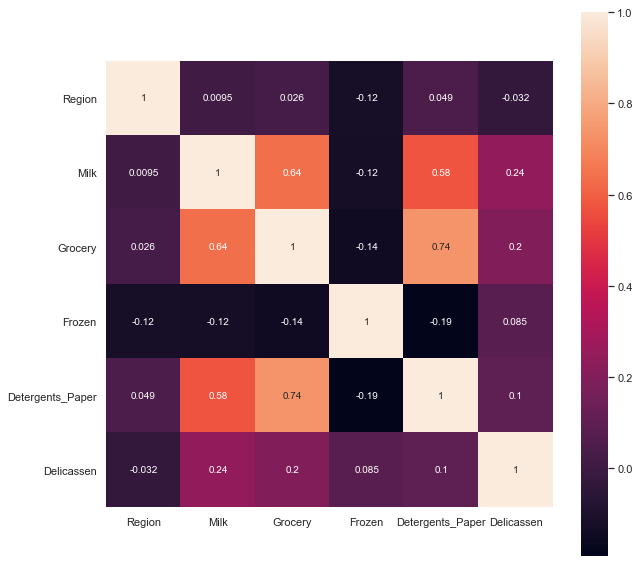

In [15]:
corr = Dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,square=True)

In [16]:
corr_target = abs(corr["Grocery"])
relevant_features = corr_target[corr_target<0.75]
relevant_features_columns = relevant_features[:][:]
relevant_features_columns

Region              0.025797
Milk                0.638812
Frozen              0.141807
Detergents_Paper    0.739266
Delicassen          0.196575
Name: Grocery, dtype: float64

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


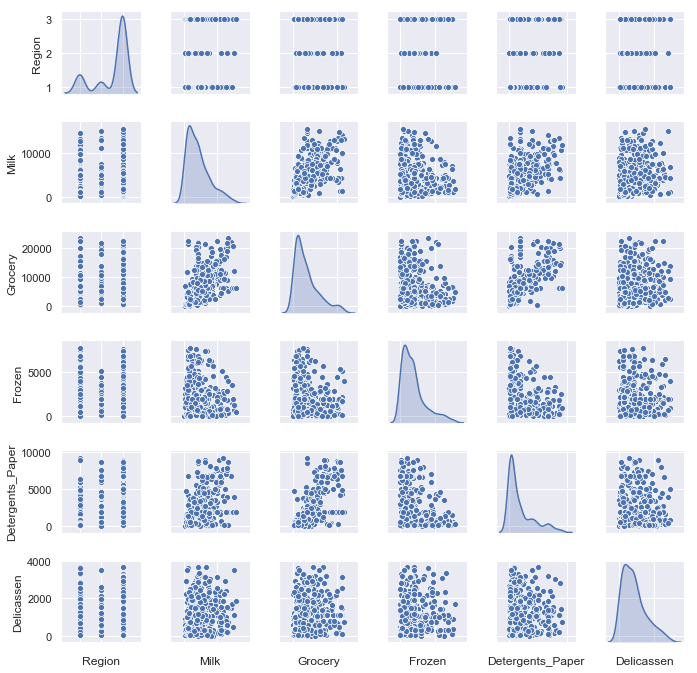

In [17]:
#Scatter plot
mx_plot = sns.pairplot(Dataset,diag_kind="kde",size=1.6)
mx_plot.set(xticklabels=[])

In [18]:
X = Dataset.drop(["Grocery"], axis=1)

In [19]:
#Scale the Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

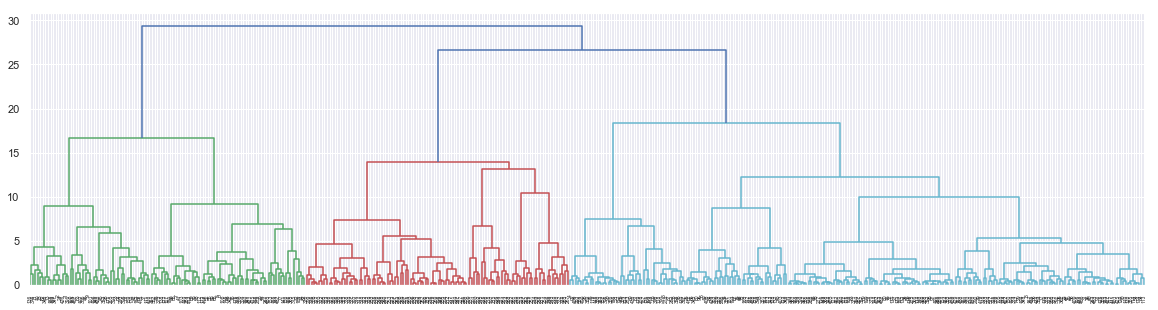

In [20]:
#Create Dendogram
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X,method="ward"))
plt.show()

In [21]:
#Creating Model
model = AgglomerativeClustering(n_clusters=7,affinity="euclidean",linkage="ward")
out = model.fit_predict(X)

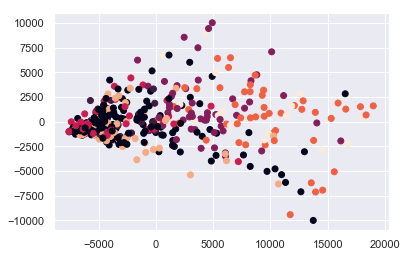

In [22]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(Dataset)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model.labels_)
plt.show()